# 1st Method

In [1]:
import numpy as np
import pandas as pd 
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('spam.csv')
df.index+=1
df

,Category,Message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [3]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1.Data cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 1 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
# check for duplicate values
df.duplicated().sum()

415

In [7]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df

,Category,Message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [8]:
df.shape

(5157, 2)

In [9]:
df['Category'] = df.Category.map({'ham':1,'spam':2})
df

,Category,Message
1,1,"Go until jurong point, crazy.. Available only ..."
2,1,Ok lar... Joking wif u oni...
3,2,Free entry in 2 a wkly comp to win FA Cup fina...
4,1,U dun say so early hor... U c already then say...
5,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,2,This is the 2nd time we have tried 2 contact u...
5569,1,Will ü b going to esplanade fr home?
5570,1,"Pity, * was in mood for that. So...any other s..."
5571,1,The guy did some bitching but I acted like i'd...


In [10]:
df.duplicated().sum()

0

## 2.EDA

In [11]:
df.sample(5)
# 1 = harm , 2 = spam

,Category,Message
928,1,But I'm on a diet. And I ate 1 too many slices...
4559,1,I am in hospital da. . I will return home in e...
3264,1,O shore are you takin the bus
4739,1,Nt only for driving even for many reasons she ...
3202,1,Just curious because my cuz asked what I was u...


In [12]:
count = df['Category'].value_counts()
count

1    4516
2     641
Name: Category, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Pie Chart Of Emails')

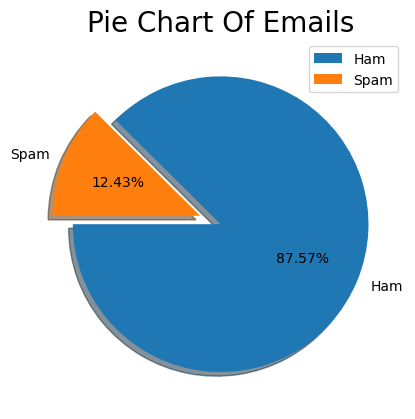

In [14]:
explode = (0, .15)
plt.pie(count,autopct='%.2f%%',labels=('Ham','Spam'),shadow=True,explode=explode,startangle=180)
plt.legend()
plt.title('Pie Chart Of Emails',size=20)

 Here we can see data is very imbalanced ham is 87.57% and spam is 12.43%

In [15]:
#!pip install nltk

In [16]:
import nltk  #  Natural Language Toolkit (NLTK)

In [17]:
#nltk.download('punkt')

In [18]:
df['Message'].apply(len)

1       111
2        29
3       155
4        49
5        61
       ... 
5568    160
5569     36
5570     57
5571    125
5572     26
Name: Message, Length: 5157, dtype: int64

In [19]:
df['no_of_char'] = df['Message'].apply(len)

In [20]:
df

,Category,Message,no_of_char
1,1,"Go until jurong point, crazy.. Available only ...",111
2,1,Ok lar... Joking wif u oni...,29
3,2,Free entry in 2 a wkly comp to win FA Cup fina...,155
4,1,U dun say so early hor... U c already then say...,49
5,1,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5568,2,This is the 2nd time we have tried 2 contact u...,160
5569,1,Will ü b going to esplanade fr home?,36
5570,1,"Pity, * was in mood for that. So...any other s...",57
5571,1,The guy did some bitching but I acted like i'd...,125


In [21]:
#!jt -r --reset    # changing theme

In [22]:
word = df['Message'].apply (lambda x:nltk.word_tokenize(x) )
word

1       [Go, until, jurong, point, ,, crazy, .., Avail...
2                [Ok, lar, ..., Joking, wif, u, oni, ...]
3       [Free, entry, in, 2, a, wkly, comp, to, win, F...
4       [U, dun, say, so, early, hor, ..., U, c, alrea...
5       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5568    [This, is, the, 2nd, time, we, have, tried, 2,...
5569      [Will, ü, b, going, to, esplanade, fr, home, ?]
5570    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5571    [The, guy, did, some, bitching, but, I, acted,...
5572                  [Rofl, ., Its, true, to, its, name]
Name: Message, Length: 5157, dtype: object

In [23]:
word = word = df['Message'].apply (lambda x:len(nltk.word_tokenize(x)))
word

1       24
2        8
3       37
4       13
5       15
        ..
5568    35
5569     9
5570    15
5571    27
5572     7
Name: Message, Length: 5157, dtype: int64

In [24]:
df['no_of_word'] = word
df

,Category,Message,no_of_char,no_of_word
1,1,"Go until jurong point, crazy.. Available only ...",111,24
2,1,Ok lar... Joking wif u oni...,29,8
3,2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
4,1,U dun say so early hor... U c already then say...,49,13
5,1,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5568,2,This is the 2nd time we have tried 2 contact u...,160,35
5569,1,Will ü b going to esplanade fr home?,36,9
5570,1,"Pity, * was in mood for that. So...any other s...",57,15
5571,1,The guy did some bitching but I acted like i'd...,125,27


In [25]:
sentence = df['Message'].apply(lambda x: nltk.sent_tokenize(x))
sentence

1       [Go until jurong point, crazy.., Available onl...
2                        [Ok lar..., Joking wif u oni...]
3       [Free entry in 2 a wkly comp to win FA Cup fin...
4       [U dun say so early hor... U c already then sa...
5       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5568    [This is the 2nd time we have tried 2 contact ...
5569               [Will ü b going to esplanade fr home?]
5570    [Pity, * was in mood for that., So...any other...
5571    [The guy did some bitching but I acted like i'...
5572                        [Rofl., Its true to its name]
Name: Message, Length: 5157, dtype: object

In [26]:
sentence = df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))
sentence

1       2
2       2
3       2
4       1
5       1
       ..
5568    4
5569    1
5570    2
5571    1
5572    2
Name: Message, Length: 5157, dtype: int64

In [27]:
df['no_of_sent'] = sentence
df

,Category,Message,no_of_char,no_of_word,no_of_sent
1,1,"Go until jurong point, crazy.. Available only ...",111,24,2
2,1,Ok lar... Joking wif u oni...,29,8,2
3,2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
4,1,U dun say so early hor... U c already then say...,49,13,1
5,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5568,2,This is the 2nd time we have tried 2 contact u...,160,35,4
5569,1,Will ü b going to esplanade fr home?,36,9,1
5570,1,"Pity, * was in mood for that. So...any other s...",57,15,2
5571,1,The guy did some bitching but I acted like i'd...,125,27,1


In [28]:
df.describe()

,Category,no_of_char,no_of_word,no_of_sent
count,5157.000000,5157.000000,5157.000000,5157.000000
mean,1.124297,79.103936,18.557882,1.950553
std,0.329952,58.382922,13.406024,1.362981
min,1.000000,2.000000,1.000000,1.000000
25%,1.000000,36.000000,9.000000,1.000000
50%,1.000000,61.000000,15.000000,1.000000
75%,1.000000,118.000000,26.000000,2.000000
max,2.000000,910.000000,220.000000,28.000000


In [29]:
# harm =1
df[df['Category']==1][['no_of_char','no_of_word','no_of_sent']].describe().round(2)

,no_of_char,no_of_word,no_of_sent
count,4516.00,4516.00,4516.00
mean,70.87,17.26,1.81
std,56.71,13.59,1.28
min,2.00,1.00,1.00
25%,34.00,8.00,1.00
50%,53.00,13.00,1.00
75%,91.00,22.00,2.00
max,910.00,220.00,28.00


In [30]:
# spam = 2
df[df['Category']==2][['no_of_char','no_of_word','no_of_sent']].describe().round(2)

,no_of_char,no_of_word,no_of_sent
count,641.00,641.00,641.00
mean,137.12,27.67,2.97
std,30.40,7.10,1.48
min,7.00,2.00,1.00
25%,130.00,25.00,2.00
50%,148.00,29.00,3.00
75%,157.00,32.00,4.00
max,223.00,46.00,8.00


Text(0.5, 1.0, 'No.of Char in Email')

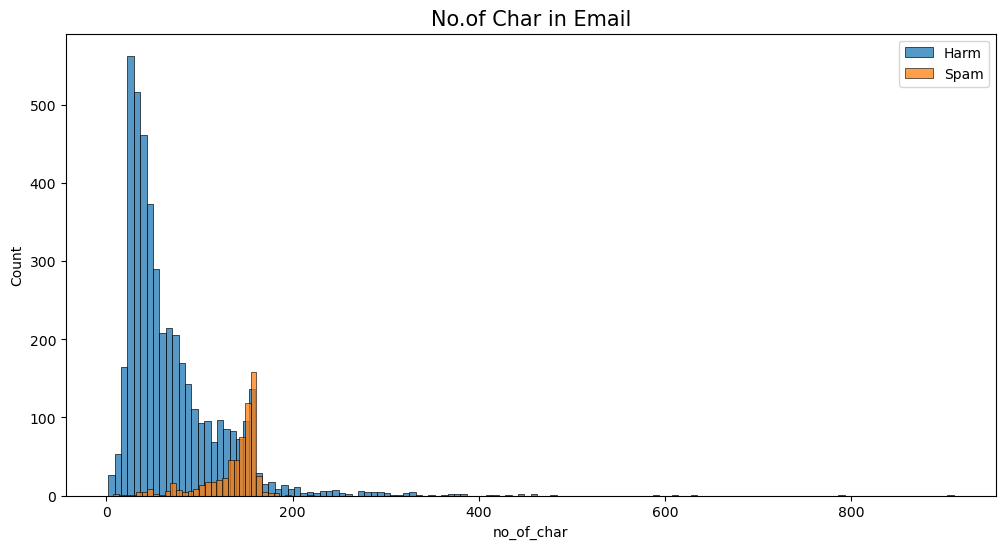

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['no_of_char'],label='Harm')
sns.histplot(df[df['Category']==2]['no_of_char'],label='Spam')
plt.legend()
plt.title('No.of Char in Email',size=15)

Text(0.5, 1.0, 'No.of Words in Email')

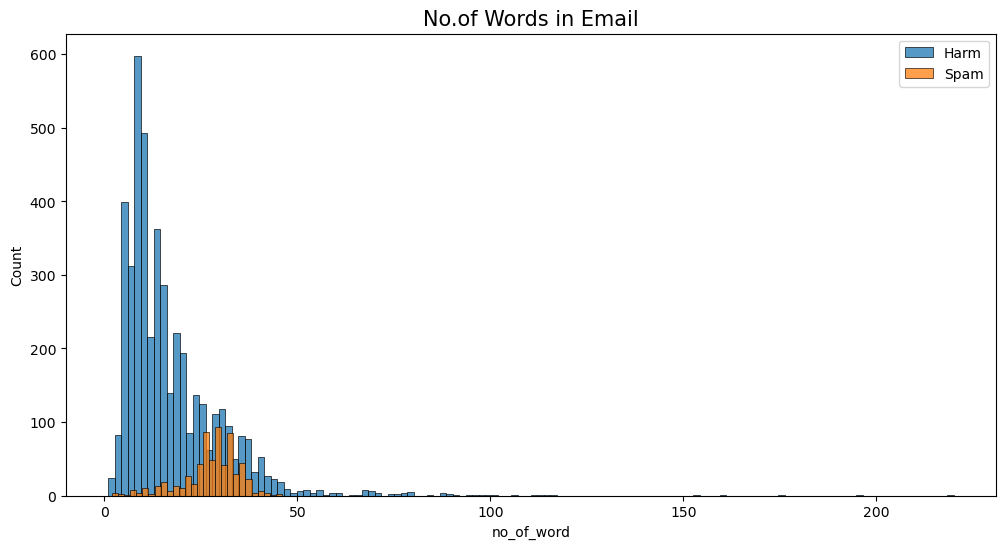

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['no_of_word'],label='Harm')
sns.histplot(df[df['Category']==2]['no_of_word'],label='Spam')
plt.legend()
plt.title('No.of Words in Email',size=15)

Text(0.5, 1.0, 'No.of Sentence in Email')

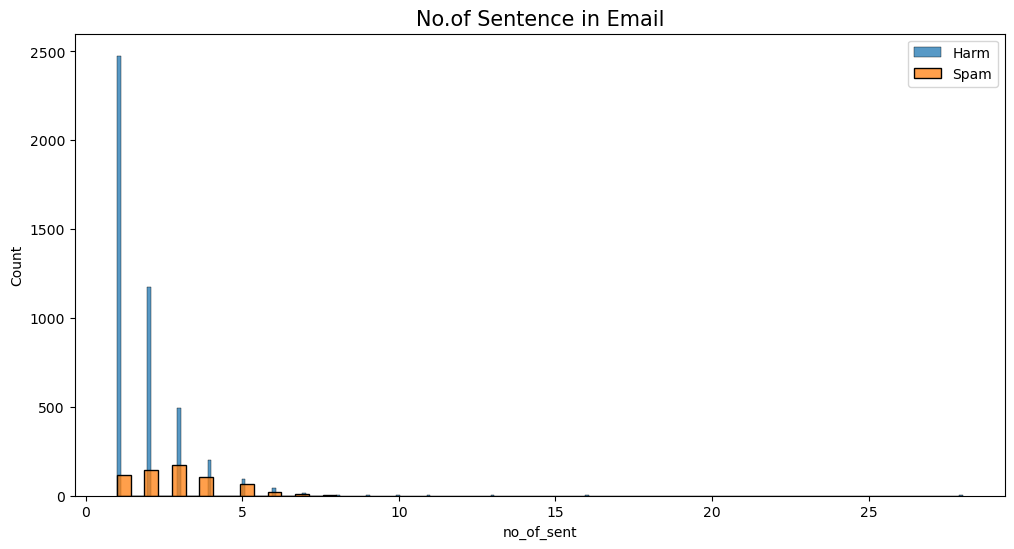

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['Category']==1]['no_of_sent'],label='Harm')
sns.histplot(df[df['Category']==2]['no_of_sent'],label='Spam')
plt.legend()
plt.title('No.of Sentence in Email',size=15)

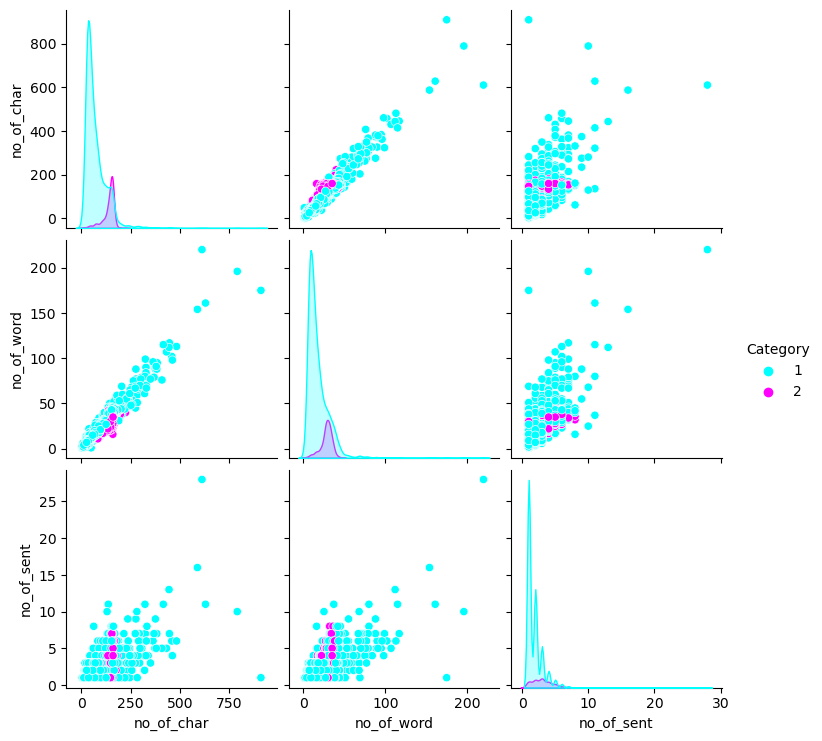

In [34]:
sns.pairplot(df,hue='Category',palette='cool')

<Axes: >

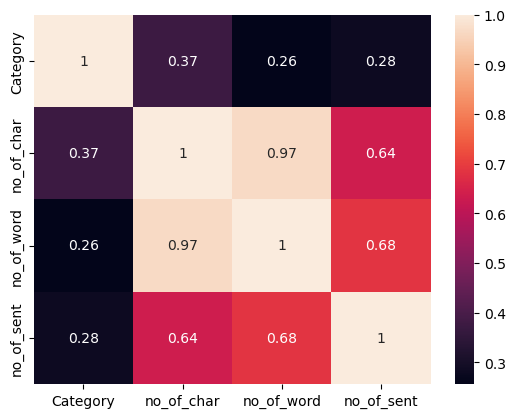

In [35]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing

--> Lower case

--> Tokenization

--> Removing special characters

--> Removing stop words and punctuation

--> Stemming

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kotesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [40]:
def transform_text(text):
    text = text.lower()  # lower case -convert all char into lower case
    text = nltk.word_tokenize(text)  # Tokenization  -it will seperate the words
    
    y = []
    for i in text:
        if i.isalnum():   # Removing special characters like ('!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:       #  Removing stop words and punctuation
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  # Stemming 
    
            
    return " ".join(y)

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried")

'gon na home soon want talk stuff anymor tonight k cri'

In [42]:
df['transformed_text'] = df['Message'].apply(transform_text)

In [43]:
df.sample(10)

,Category,Message,no_of_char,no_of_word,no_of_sent,transformed_text
3028,1,I finished my lunch already. U wake up already?,47,11,2,finish lunch alreadi u wake alreadi
1038,1,"No my blankets are sufficient, thx",34,7,1,blanket suffici thx
475,2,Want 2 get laid tonight? Want real Dogging loc...,159,34,5,want 2 get laid tonight want real dog locat se...
2192,1,"Ooh, 4got, i'm gonna start belly dancing in mo...",104,28,1,ooh 4got gon na start belli danc moseley wed u...
4793,1,Send me your resume:-),22,7,1,send resum
3730,1,The search 4 happiness is 1 of d main sources ...,137,30,3,search 4 happi 1 main sourc unhappi accept lif...
5502,2,PRIVATE! Your 2003 Account Statement for 07808...,148,24,3,privat 2003 account statement 07808247860 show...
4299,2,thesmszone.com lets you send free anonymous an...,138,27,2,let send free anonym mask messag im send messa...
2718,1,"House-Maid is the murderer, coz the man was mu...",166,35,1,murder coz man murder lt gt th januari public ...
1130,2,Ur HMV Quiz cash-balance is currently £500 - t...,104,19,1,ur hmv quiz current maxim ur send hmv1 86688


In [1]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/34/ac/72a4e42e76bf549dfd91791a6b10a9832f046c1d48b5e778be9ec012aa47/wordcloud-1.9.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
   -------- ------------------------------- 30.7/151.4 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/151.4 kB 495.5 kB/s eta 0:00:01
   -------------------------------- ------- 122.9/151.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------- ------- 122.9/151.4 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 151.4/151.4 kB 755.0 kB/s eta 0:00:00


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
spam_wc = wc.generate(df[df['Category'] == 2]['transformed_text'].str.cat(sep=" "))

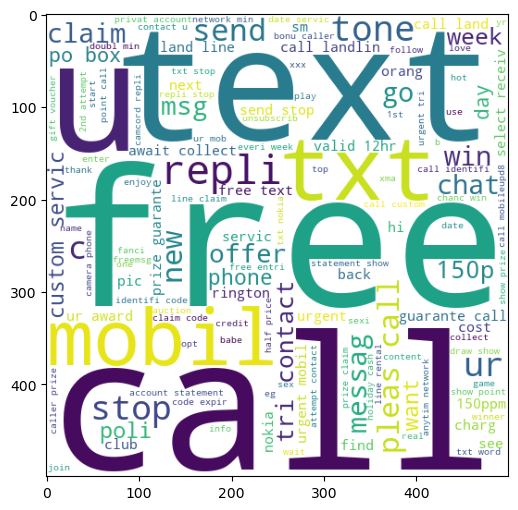

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

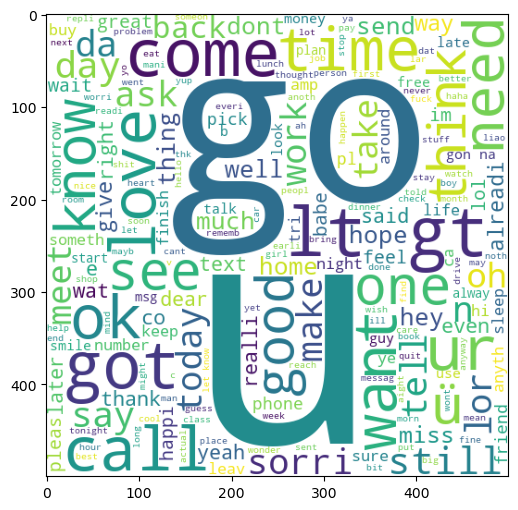

In [48]:
ham_wc = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [49]:
df.head(10)

,Category,Message,no_of_char,no_of_word,no_of_sent,transformed_text
1,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
2,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
4,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
5,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
6,2,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...
7,1,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
8,1,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
9,2,WINNER!! As a valued network customer you have...,157,32,5,winner valu network custom select receivea pri...
10,2,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


In [50]:
spam_cor = []
for msg in df[df['Category'] == 2]['transformed_text'].tolist():
    for word in msg.split():
        spam_cor.append(word)

In [51]:
print(spam_cor)

['free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', 'tkt', '21st', 'may', 'text', 'fa', '87121', 'receiv', 'entri', 'question', 'std', 'txt', 'rate', 'c', 'appli', '08452810075over18', 'freemsg', 'hey', 'darl', '3', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chg', 'send', 'rcv', 'winner', 'valu', 'network', 'custom', 'select', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl341', 'valid', '12', 'hour', 'mobil', '11', 'month', 'u', 'r', 'entitl', 'updat', 'latest', 'colour', 'mobil', 'camera', 'free', 'call', 'mobil', 'updat', 'co', 'free', '08002986030', 'six', 'chanc', 'win', 'cash', '100', 'pound', 'txt', 'csh11', 'send', 'cost', '6day', 'tsandc', 'appli', 'repli', 'hl', '4', 'info', 'urgent', '1', 'week', 'free', 'membership', 'prize', 'jackpot', 'txt', 'word', 'claim', '81010', 'c', 'lccltd', 'pobox', '4403ldnw1a7rw18', 'xxxmobilemovieclub', 'use', 'credit', 'click', 'wap', 'link', 'next', 'txt', 'messag', 'click',

In [52]:
len(spam_cor)

9781

In [54]:
# most common word repeated in the spam mail
from collections import Counter
Counter(spam_cor).most_common(30)

[('call', 311),
 ('free', 186),
 ('2', 154),
 ('txt', 139),
 ('text', 122),
 ('ur', 119),
 ('u', 115),
 ('mobil', 110),
 ('stop', 108),
 ('repli', 103),
 ('claim', 96),
 ('4', 95),
 ('prize', 78),
 ('get', 73),
 ('new', 64),
 ('servic', 64),
 ('send', 60),
 ('tone', 59),
 ('urgent', 56),
 ('award', 55),
 ('nokia', 54),
 ('contact', 53),
 ('phone', 52),
 ('cash', 50),
 ('pleas', 50),
 ('week', 48),
 ('win', 46),
 ('min', 45),
 ('c', 43),
 ('guarante', 42)]

In [ ]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(spam_cor).most_common(30))[0],pd.DataFrame(Counter(spam_cor).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

In [55]:
ham_cor = []
for msg in df[df['Category'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        ham_cor.append(word)

In [56]:
print(ham_cor)

['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat', 'ok', 'lar', 'joke', 'wif', 'u', 'oni', 'u', 'dun', 'say', 'earli', 'hor', 'u', 'c', 'alreadi', 'say', 'nah', 'think', 'goe', 'usf', 'live', 'around', 'though', 'even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent', 'per', 'request', 'mell', 'oru', 'minnaminungint', 'nurungu', 'vettam', 'set', 'callertun', 'caller', 'press', '9', 'copi', 'friend', 'callertun', 'gon', 'na', 'home', 'soon', 'want', 'talk', 'stuff', 'anymor', 'tonight', 'k', 'cri', 'enough', 'today', 'search', 'right', 'word', 'thank', 'breather', 'promis', 'wont', 'take', 'help', 'grant', 'fulfil', 'promis', 'wonder', 'bless', 'time', 'date', 'sunday', 'oh', 'k', 'watch', 'eh', 'u', 'rememb', '2', 'spell', 'name', 'ye', 'v', 'naughti', 'make', 'v', 'wet', 'fine', 'way', 'u', 'feel', 'way', 'gota', 'b', 'serious', 'spell', 'name', 'go', 'tri', '2', 'month', 'ha', 'ha', 'joke', 'ü', '

In [57]:
# from collections import Counter
# sns.barplot(pd.DataFrame(Counter(ham_cor).most_common(30))[2],pd.DataFrame(Counter(ham_cor).most_common(30))[1])
# plt.xticks(rotation='vertical')
# plt.show()

In [60]:
# most common word repeated in the harm mail
Counter(ham_cor).most_common(30)

[('u', 897),
 ('go', 407),
 ('get', 351),
 ('2', 288),
 ('gt', 288),
 ('lt', 287),
 ('come', 278),
 ('got', 239),
 ('know', 237),
 ('like', 236),
 ('call', 235),
 ('love', 222),
 ('time', 220),
 ('ok', 218),
 ('good', 215),
 ('want', 209),
 ('ur', 203),
 ('day', 195),
 ('ü', 173),
 ('need', 171),
 ('one', 166),
 ('4', 162),
 ('lor', 159),
 ('home', 152),
 ('think', 150),
 ('see', 148),
 ('take', 144),
 ('still', 144),
 ('da', 138),
 ('tell', 133)]

In [59]:
df.head(10)

,Category,Message,no_of_char,no_of_word,no_of_sent,transformed_text
1,1,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
2,1,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
3,2,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
4,1,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
5,1,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
6,2,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl 3 week word back like fun sti...
7,1,Even my brother is not like to speak with me. ...,77,18,2,even brother like speak treat like aid patent
8,1,As per your request 'Melle Melle (Oru Minnamin...,160,31,2,per request mell oru minnaminungint nurungu ve...
9,2,WINNER!! As a valued network customer you have...,157,32,5,winner valu network custom select receivea pri...
10,2,Had your mobile 11 months or more? U R entitle...,154,31,3,mobil 11 month u r entitl updat latest colour ...


# 4. Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
# use any one model to convert email text into numbers
cv = CountVectorizer() 
tfi = TfidfVectorizer()

In [63]:
convert_text = cv.fit_transform(df.transformed_text).toarray()

In [64]:
convert_text

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
convert_text.shape

(5157, 6781)

In [66]:
y = df.Category.values
y

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(convert_text,y,test_size=.05,random_state=2)

In [69]:
# naive bayes is the best ml model to email/sms detection
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
mn = MultinomialNB()
gn = GaussianNB()
bn = BernoulliNB()

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

### MultinomialNB

In [71]:
mn.fit(x_train,y_train)
y_predict_1 = mn.predict(x_test)
print('accuracy_score :-',accuracy_score(y_test,y_predict_1))
print('precision_score :-',precision_score(y_test,y_predict_1))
print('confusion_matrix :-\n ',confusion_matrix(y_test,y_predict_1))

accuracy_score :- 0.9806201550387597
precision_score :- 0.9955357142857143
confusion_matrix :-
  [[223   4]
 [  1  30]]


### GaussianNB

In [72]:
gn.fit(x_train,y_train)
y_predict_2 = gn.predict(x_test)
print('accuracy_score :-',accuracy_score(y_test,y_predict_2))
print('precision_score :-',precision_score(y_test,y_predict_2))
print('confusion_matrix :-\n ',confusion_matrix(y_test,y_predict_2))

accuracy_score :- 0.8255813953488372
precision_score :- 0.9840425531914894
confusion_matrix :-
  [[185  42]
 [  3  28]]


### BernoulliNB

In [73]:
bn.fit(x_train,y_train)
y_predict_3 = bn.predict(x_test)
print('accuracy_score :-',accuracy_score(y_test,y_predict_3))
print('precision_score :-',precision_score(y_test,y_predict_3))
print('confusion_matrix :-\n ',confusion_matrix(y_test,y_predict_3))

accuracy_score :- 0.9767441860465116
precision_score :- 0.982532751091703
confusion_matrix :-
  [[225   2]
 [  4  27]]


MultinomialNB perform good

# 2nd Method

In [74]:
df = pd.read_csv('spam.csv')
df.index+=1
df

,Category,Message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 1 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [76]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [77]:
df.duplicated().sum()

415

In [78]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df

,Category,Message
1,ham,"Go until jurong point, crazy.. Available only ..."
2,ham,Ok lar... Joking wif u oni...
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,spam,This is the 2nd time we have tried 2 contact u...
5569,ham,Will ü b going to esplanade fr home?
5570,ham,"Pity, * was in mood for that. So...any other s..."
5571,ham,The guy did some bitching but I acted like i'd...


In [79]:
df['Category'] = df.Category.map({'ham':1,'spam':2})
df

,Category,Message
1,1,"Go until jurong point, crazy.. Available only ..."
2,1,Ok lar... Joking wif u oni...
3,2,Free entry in 2 a wkly comp to win FA Cup fina...
4,1,U dun say so early hor... U c already then say...
5,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,2,This is the 2nd time we have tried 2 contact u...
5569,1,Will ü b going to esplanade fr home?
5570,1,"Pity, * was in mood for that. So...any other s..."
5571,1,The guy did some bitching but I acted like i'd...


In [80]:
df.duplicated().sum()

0

In [81]:
x = cv.fit_transform(df.Message).toarray()
y = df.Category.values

In [82]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=.05,random_state=2)

## MultinomialNB

In [83]:
mn.fit(X_train,Y_train)
y_pred1 = mn.predict(X_test)
print('accuracy_score :-',accuracy_score(Y_test,y_pred1))
print('precision_score :-',precision_score(Y_test,y_pred1))
print('confusion_matrix :-\n ',confusion_matrix(Y_test,y_pred1))

accuracy_score :- 0.9883720930232558
precision_score :- 1.0
confusion_matrix :-
  [[224   3]
 [  0  31]]


## GaussianNB

In [ ]:
gn.fit(X_train,Y_train)
y_pred2 = gn.predict(X_test)
print('accuracy_score :-',accuracy_score(Y_test,y_pred2))
print('precision_score :-',precision_score(Y_test,y_pred2))
print('confusion_matrix :-\n ',confusion_matrix(Y_test,y_pred2))

## BernoulliNB

In [85]:
bn.fit(X_train,Y_train)
y_pred3 = bn.predict(X_test)
print('accuracy_score :-',accuracy_score(Y_test,y_pred3))
print('precision_score :-',precision_score(Y_test,y_pred3))
print('confusion_matrix :-\n ',confusion_matrix(Y_test,y_pred3))

accuracy_score :- 0.9844961240310077
precision_score :- 0.9826839826839827
confusion_matrix :-
  [[227   0]
 [  4  27]]


In [86]:
df

,Category,Message
1,1,"Go until jurong point, crazy.. Available only ..."
2,1,Ok lar... Joking wif u oni...
3,2,Free entry in 2 a wkly comp to win FA Cup fina...
4,1,U dun say so early hor... U c already then say...
5,1,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,2,This is the 2nd time we have tried 2 contact u...
5569,1,Will ü b going to esplanade fr home?
5570,1,"Pity, * was in mood for that. So...any other s..."
5571,1,The guy did some bitching but I acted like i'd...


In [87]:
x_train,x_test,y_train,y_test = train_test_split(df.Message,df.Category,test_size=.1)

In [88]:
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [89]:
clf.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [91]:
y_predicts = clf.predict(x_test)
print(accuracy_score(y_test,y_predicts))
print(confusion_matrix(y_test,y_predicts))
print(precision_score(y_test,y_predicts))

0.9844961240310077
[[450   1]
 [  7  58]]
0.9846827133479212


In [92]:
emails = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!']

In [93]:
clf.predict(emails)

array([1, 2], dtype=int64)

In [94]:
from sklearn.pipeline import Pipeline
clf_tfi = Pipeline([
    ('tfidfvector', TfidfVectorizer(max_features=2000)),
    ('nb', MultinomialNB())
])

In [95]:
clf_tfi.fit(x_train,y_train)

Pipeline(steps=[('tfidfvector', TfidfVectorizer(max_features=2000)),
                ('nb', MultinomialNB())])

In [96]:
y_predicts_tfi = clf_tfi.predict(x_test)
print(accuracy_score(y_test,y_predicts_tfi))
print(confusion_matrix(y_test,y_predicts_tfi))
print(precision_score(y_test,y_predicts_tfi))

0.9689922480620154
[[451   0]
 [ 16  49]]
0.9657387580299786


In [97]:
clf_tfi.predict(emails)

array([1, 1], dtype=int64)